In [9]:
from pathlib import Path
from datasets import load_dataset, DownloadMode
import torch
import os
import glob
from transformers import AutoModelForCausalLM, AutoTokenizer, BitsAndBytesConfig
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from llama_wrapper import LlamaPromptLens, run_logit_lens_batched

In [10]:
from enum import Enum

class Models(Enum):
    LAIN8B = "Models/LLaMA3Instruct"
    HF100B = "Models/HF1BitLLM100Btokens"


class Names(Enum):
    LAIN8B = "Meta-Llama-3-8B-Instruct-fp"
    HF100B = "Llama3-8B-1.58-100B-tokens"

In [3]:
filepath = r'D:\LogitLensData\nq'

destination_path = str(Path(filepath))
nq_dataset = load_dataset(
    'sentence-transformers/natural-questions',
    split={
        'train': 'train[:1000]'
    },
    cache_dir=destination_path,
    download_mode=DownloadMode.REUSE_DATASET_IF_EXISTS,
    keep_in_memory=True
)

In [4]:
nq_queries = nq_dataset['train']['query']
nq_answers = nq_dataset['train']['answer']

In [6]:
nq_queries_200 = nq_queries[:200]
nq_queries_400 = nq_queries[200:400]
nq_queries_600 = nq_queries[400:600]
nq_queries_800 = nq_queries[600:800]
nq_queries_1000 = nq_queries[800:1000]

### LLaMA FP

In [7]:
llama8b_fp = LlamaPromptLens(
    model_id=Models.LAIN8B.value,
    apply_per_layer_norm=True,
    include_subblocks=False,
    device="cpu"
)

Loading checkpoint shards:   0%|          | 0/7 [00:00<?, ?it/s]

Architecture detected: llama
Standard FP16 or FP32 model.


In [8]:
run_logit_lens_batched(
    lens=llama8b_fp,
    prompts=nq_queries_200,
    dataset_name="nq_query_200",
    model_name="llama8b_fp",
    save_dir="logs/lens_batches_norm/llama8b_fp/nq_200",
    proj_precision=None,
    batch_size=10,
)

[✓] Saved batch 0: logs/lens_batches_norm/llama8b_fp/nq_200/nq_query_200_llama8b_fp_batch0.pt
[✓] Saved batch 1: logs/lens_batches_norm/llama8b_fp/nq_200/nq_query_200_llama8b_fp_batch1.pt
[✓] Saved batch 2: logs/lens_batches_norm/llama8b_fp/nq_200/nq_query_200_llama8b_fp_batch2.pt
[✓] Saved batch 3: logs/lens_batches_norm/llama8b_fp/nq_200/nq_query_200_llama8b_fp_batch3.pt
[✓] Saved batch 4: logs/lens_batches_norm/llama8b_fp/nq_200/nq_query_200_llama8b_fp_batch4.pt
[✓] Saved batch 5: logs/lens_batches_norm/llama8b_fp/nq_200/nq_query_200_llama8b_fp_batch5.pt
[✓] Saved batch 6: logs/lens_batches_norm/llama8b_fp/nq_200/nq_query_200_llama8b_fp_batch6.pt
[✓] Saved batch 7: logs/lens_batches_norm/llama8b_fp/nq_200/nq_query_200_llama8b_fp_batch7.pt
[✓] Saved batch 8: logs/lens_batches_norm/llama8b_fp/nq_200/nq_query_200_llama8b_fp_batch8.pt
[✓] Saved batch 9: logs/lens_batches_norm/llama8b_fp/nq_200/nq_query_200_llama8b_fp_batch9.pt
[✓] Saved batch 10: logs/lens_batches_norm/llama8b_fp/nq_200

In [7]:
import torch

data = torch.load(
    "logs/lens_batches/nq_query_llama8b_fp_batch0.pt",
    weights_only=False 
)

### HF1BitLLM

In [10]:
llama8b_hf100b = LlamaPromptLens(
    model_id=Models.HF100B.value,
    apply_per_layer_norm=True,
    include_subblocks=False,
    device="cpu"
)

Architecture detected: bitnet
BitNet model (BitLinear layers).


In [11]:
run_logit_lens_batched(
    lens=llama8b_hf100b,
    prompts=nq_queries_200,
    dataset_name="nq_query_200",
    model_name="llama8b_hf100b",
    save_dir="logs/lens_batches_norm/llama8b_hf100b/nq_200",
    proj_precision=None,
    batch_size=10,
)

[✓] Saved batch 0: logs/lens_batches_norm/llama8b_hf100b/nq_200/nq_query_200_llama8b_hf100b_batch0.pt
[✓] Saved batch 1: logs/lens_batches_norm/llama8b_hf100b/nq_200/nq_query_200_llama8b_hf100b_batch1.pt
[✓] Saved batch 2: logs/lens_batches_norm/llama8b_hf100b/nq_200/nq_query_200_llama8b_hf100b_batch2.pt
[✓] Saved batch 3: logs/lens_batches_norm/llama8b_hf100b/nq_200/nq_query_200_llama8b_hf100b_batch3.pt
[✓] Saved batch 4: logs/lens_batches_norm/llama8b_hf100b/nq_200/nq_query_200_llama8b_hf100b_batch4.pt
[✓] Saved batch 5: logs/lens_batches_norm/llama8b_hf100b/nq_200/nq_query_200_llama8b_hf100b_batch5.pt
[✓] Saved batch 6: logs/lens_batches_norm/llama8b_hf100b/nq_200/nq_query_200_llama8b_hf100b_batch6.pt
[✓] Saved batch 7: logs/lens_batches_norm/llama8b_hf100b/nq_200/nq_query_200_llama8b_hf100b_batch7.pt
[✓] Saved batch 8: logs/lens_batches_norm/llama8b_hf100b/nq_200/nq_query_200_llama8b_hf100b_batch8.pt
[✓] Saved batch 9: logs/lens_batches_norm/llama8b_hf100b/nq_200/nq_query_200_llama

In [5]:
import torch

data = torch.load(
    "logs/lens_batches_raw/llama8b_hf100b/nq_200/nq_query_200_llama8b_hf100b_batch0.pt",
    weights_only=False 
)

In [6]:
data.tail()

,prompt_id,prompt_text,dataset,vocab_size,layer_index,layer_name,input_ids,target_ids,logits,position
675,19,where was the movie paint your wagon filmed,nq_query_200,128000,29,layer_28,"[tensor(128000), tensor(2940), tensor(574), te...","[tensor(2940), tensor(574), tensor(279), tenso...","[[tensor(0.1147), tensor(0.3710), tensor(0.364...","[tensor(0), tensor(1), tensor(2), tensor(3), t..."
676,19,where was the movie paint your wagon filmed,nq_query_200,128000,30,layer_29,"[tensor(128000), tensor(2940), tensor(574), te...","[tensor(2940), tensor(574), tensor(279), tenso...","[[tensor(0.0390), tensor(0.9849), tensor(0.869...","[tensor(0), tensor(1), tensor(2), tensor(3), t..."
677,19,where was the movie paint your wagon filmed,nq_query_200,128000,31,layer_30,"[tensor(128000), tensor(2940), tensor(574), te...","[tensor(2940), tensor(574), tensor(279), tenso...","[[tensor(1.9523), tensor(4.6706), tensor(3.442...","[tensor(0), tensor(1), tensor(2), tensor(3), t..."
678,19,where was the movie paint your wagon filmed,nq_query_200,128000,32,layer_31,"[tensor(128000), tensor(2940), tensor(574), te...","[tensor(2940), tensor(574), tensor(279), tenso...","[[tensor(2.4057), tensor(6.3078), tensor(4.542...","[tensor(0), tensor(1), tensor(2), tensor(3), t..."
679,19,where was the movie paint your wagon filmed,nq_query_200,128000,33,output,"[tensor(128000), tensor(2940), tensor(574), te...","[tensor(2940), tensor(574), tensor(279), tenso...","[[tensor(3.4929), tensor(8.4756), tensor(5.696...","[tensor(0), tensor(1), tensor(2), tensor(3), t..."


In [7]:
import torch

data_fp = torch.load(
    "logs/lens_batches_raw/llama8b_fp/nq_200/nq_query_200_llama8b_fp_batch0.pt",
    weights_only=False 
)

In [8]:
data_fp.tail()

,prompt_id,prompt_text,dataset,vocab_size,layer_index,layer_name,input_ids,target_ids,logits,position
675,19,where was the movie paint your wagon filmed,nq_query_200,128000,29,layer_28,"[tensor(128000), tensor(2940), tensor(574), te...","[tensor(2940), tensor(574), tensor(279), tenso...","[[tensor(-0.1136), tensor(-0.9532), tensor(-0....","[tensor(0), tensor(1), tensor(2), tensor(3), t..."
676,19,where was the movie paint your wagon filmed,nq_query_200,128000,30,layer_29,"[tensor(128000), tensor(2940), tensor(574), te...","[tensor(2940), tensor(574), tensor(279), tenso...","[[tensor(-0.6219), tensor(-0.4604), tensor(-0....","[tensor(0), tensor(1), tensor(2), tensor(3), t..."
677,19,where was the movie paint your wagon filmed,nq_query_200,128000,31,layer_30,"[tensor(128000), tensor(2940), tensor(574), te...","[tensor(2940), tensor(574), tensor(279), tenso...","[[tensor(-3.5245), tensor(-1.0180), tensor(-3....","[tensor(0), tensor(1), tensor(2), tensor(3), t..."
678,19,where was the movie paint your wagon filmed,nq_query_200,128000,32,layer_31,"[tensor(128000), tensor(2940), tensor(574), te...","[tensor(2940), tensor(574), tensor(279), tenso...","[[tensor(14.7182), tensor(17.2502), tensor(11....","[tensor(0), tensor(1), tensor(2), tensor(3), t..."
679,19,where was the movie paint your wagon filmed,nq_query_200,128000,33,output,"[tensor(128000), tensor(2940), tensor(574), te...","[tensor(2940), tensor(574), tensor(279), tenso...","[[tensor(4.2573), tensor(7.2598), tensor(4.488...","[tensor(0), tensor(1), tensor(2), tensor(3), t..."


# Softmax and Single Model Computations

In [10]:
import torch
import torch.nn.functional as F
import pandas as pd
from collections import defaultdict

def extract_metrics(
    data,
    topk=[1, 5, 10, 20],
    mask_ids=[128000, 128009],
    device=None,
):
    """
    Extract top-k accuracy, log-probs, and NLL metrics from logit lens outputs.
    Works with both a list of dicts and a pandas DataFrame (as produced by _run_logit_lens_batch).
    """

    if isinstance(data, pd.DataFrame):
        data = data.to_dict(orient="records")

    results = []
    all_k = sorted(set([1] + list(topk)))  # always include top-1
    max_k = max(all_k)

    device = device or ("cuda" if torch.cuda.is_available() else "cpu")
    mask_ids = torch.tensor(mask_ids, device=device)

    for row in data:
        logits = row["logits"].to(device)  # [seq_len, vocab]
        targets = row.get("target_ids", None)
        if targets is not None:
            targets = targets.to(device)

        # --- normalize shapes ---
        if logits.dim() == 3 and logits.size(0) == 1:
            logits = logits.squeeze(0)
        if targets is not None and targets.dim() == 2 and targets.size(0) == 1:
            targets = targets.squeeze(0)

        seq_len, vocab_size = logits.shape

        # --- stable softmax ---
        log_probs = F.log_softmax(logits, dim=-1)
        probs = log_probs.exp()

        # --- top-k predictions ---
        top_vals, top_idx = torch.topk(probs, max_k, dim=-1)
        topk_preds = {k: top_idx[:, :k] for k in all_k}
        topk_vals = {k: top_vals[:, :k] for k in all_k}

        # --- metrics if targets exist ---
        if targets is not None:
            # mask out special tokens
            mask = ~torch.isin(targets, mask_ids)

            # target log probs and nll
            target_logprobs = log_probs[torch.arange(seq_len, device=device), targets]
            target_probs = target_logprobs.exp()
            nll = -target_logprobs

            # accuracy metrics
            correct_topk, acc_topk = {}, {}
            for k in all_k:
                correct = (targets.unsqueeze(-1) == topk_preds[k]).any(dim=-1).int()
                correct_topk[k] = correct
                valid_correct = correct[mask]
                acc_mean = valid_correct.float().mean().item() if valid_correct.numel() > 0 else float("nan")
                acc_topk[k] = {"mean": acc_mean, "per_token": correct.tolist()}

            # monotonicity sanity check
            for k1, k2 in zip(all_k[:-1], all_k[1:]):
                assert (correct_topk[k1] <= correct_topk[k2]).all(), f"Top-{k1} not subset of top-{k2}"

        else:
            mask = target_probs = target_logprobs = nll = correct_topk = acc_topk = None

        results.append({
            "prompt_id": row.get("prompt_id"),
            "prompt_text": row.get("prompt_text"),
            "layer_index": row.get("layer_index"),
            "layer_name": row.get("layer_name"),
            "dataset": row.get("dataset"),
            "vocab_size": vocab_size,
            "input_ids": row.get("input_ids"),
            "position": row.get("position"),
            "targets": targets,
            "mask": mask,
            "logits": logits.cpu(),
            "log_probs": log_probs.cpu(),
            "probs": probs.cpu(),
            "nll": nll.cpu() if nll is not None else None,
            "target_probs": target_probs.cpu() if target_probs is not None else None,
            "target_logprobs": target_logprobs.cpu() if target_logprobs is not None else None,
            "topk_preds": {k: v.cpu() for k, v in topk_preds.items()},
            "topk_vals": {k: v.cpu() for k, v in topk_vals.items()},
            "correct_topk": {k: v.cpu() for k, v in correct_topk.items()} if correct_topk else None,
            "acc_topk": acc_topk,
        })

    return results


batch_num = 19
lens_type = "norm" # raw
model_name = "hf100b" # "fp"

# Load logits:
model_logits = torch.load(
    f"logs/lens_batches_{lens_type}/llama8b_{model_name}/nq_200/nq_query_200_llama8b_{model_name}_batch{batch_num}.pt",
    weights_only=False 
)

# Extract topk metrics:
extracted_metrics = extract_metrics(model_logits)

# Saving as a torch file:
save_path = f"logs/batch_probs_{lens_type}/llama8b_{model_name}/nq_200/nq_query_200_llama8b_{model_name}_batch{batch_num}.pt"
torch.save(extracted_metrics, save_path)

### [✓] Non-normalized Lens DONE
### [✓] Normalized Lens DONE

# Comparing Analysis

In [ ]:
from transformers import AutoTokenizer

tok_a = AutoTokenizer.from_pretrained(Models.LAIN8B.value)
tok_b = AutoTokenizer.from_pretrained(Models.HF100B.value)

print("Tokenizer A vocab size:", len(tok_a))
print("Tokenizer B vocab size:", len(tok_b))

shared = set(tok_a.get_vocab().keys()) & set(tok_b.get_vocab().keys())
unique_a = set(tok_a.get_vocab().keys()) - set(tok_b.get_vocab().keys())
unique_b = set(tok_b.get_vocab().keys()) - set(tok_a.get_vocab().keys())

print(f"Shared tokens: {len(shared)}")
print(f"Unique to A: {len(unique_a)} | Unique to B: {len(unique_b)}")

mismatches = []
for token, id_a in tok_a.get_vocab().items():
    id_b = tok_b.get_vocab().get(token, None)
    if id_b is not None and id_a != id_b:
        mismatches.append((token, id_a, id_b))
    if len(mismatches) > 10:
        break

if not mismatches:
    print("Token IDs aligned between tokenizers!")
else:
    print("Some token ID mismatches found:")
    for token, id_a, id_b in mismatches[:5]:
        print(f"  '{token}': A={id_a}, B={id_b}")

In [4]:
import torch
import torch.nn.functional as F
import numpy as np
import pandas as pd


def js_divergence_from_logprobs_nats(lp, lq, dim=-1, eps=1e-12, base="e"):
    """
    Jensen–Shannon divergence from log-probabilities.
    More stable than using raw probabilities.
    Returns divergence in nats (base-e) or bits (base-2).
    """
    lp, lq = lp.float(), lq.float()
    p, q = lp.exp(), lq.exp()
    m = 0.5 * (p + q)

    kl_pm = torch.sum(p * (lp - torch.log(m + eps)), dim=dim)
    kl_qm = torch.sum(q * (lq - torch.log(m + eps)), dim=dim)
    jsd = 0.5 * (kl_pm + kl_qm)

    if base == "2":  # convert nats → bits JSD_bits ∈ [0, 1]
        jsd = jsd / torch.log(torch.tensor(2.0))
    return jsd

def js_distance_from_logprobs(lp, lq, dim=-1, eps=1e-12, base="e"):
    return torch.sqrt(js_divergence_from_logprobs(lp, lq, dim=dim, eps=eps, base=base))

def js_divergence_from_logprobs(lp, lq, dim=-1, eps=1e-12):
    """Numerically stable Jensen–Shannon divergence from log-probabilities."""
    lp, lq = lp.float(), lq.float()
    p, q = lp.exp(), lq.exp()
    m = 0.5 * (p + q)

    # KL(P‖M) and KL(Q‖M) in log-space (using lp, lq)
    kl_pm = torch.sum(p * (lp - torch.log(m + eps)), dim=dim)
    kl_qm = torch.sum(q * (lq - torch.log(m + eps)), dim=dim)
    return 0.5 * (kl_pm + kl_qm)

def safe_mean(x):
    """Robust mean helper for torch tensors, lists, or None."""
    if x is None:
        return None
    if torch.is_tensor(x):
        if x.numel() == 0:
            return None
        return x.float().mean().item()
    if isinstance(x, (list, tuple, np.ndarray)):
        if len(x) == 0:
            return None
        return float(np.nanmean(x))
    return float(x)

@torch.no_grad()
def compare_metrics(
    metrics_A,
    metrics_B,
    topk=(1, 5, 10, 20),
    eps=1e-9,
    mode="aligned",  # "aligned" | "position_final"
    mask_ids=[128000, 128009],
    batch_num=0,
    lens_type="raw"
):
    """
    Compare per-token probability distributions between two logit-lens runs.
    Returns:
        detailed: list[dict] per-prompt/layer
        summary: pd.DataFrame aggregated per layer
    """
    topk = sorted(set([1] + list(topk)))
    max_k = max(topk)

    # --- Pair rows ---
    if mode == "aligned":
        pairs = list(zip(metrics_A, metrics_B))
    elif mode == "position_final":
        def last_by_prompt(rows):
            best = {}
            for r in rows:
                pid = r["prompt_id"]
                if pid not in best or r["layer_index"] > best[pid]["layer_index"]:
                    best[pid] = r
            return best
        last_A = last_by_prompt(metrics_A)
        last_B = last_by_prompt(metrics_B)
        common_pids = sorted(set(last_A) & set(last_B))
        pairs = [(last_A[pid], last_B[pid]) for pid in common_pids]
    else:
        raise ValueError(f"Unknown mode: {mode}")

    detailed = []

    for row_A, row_B in pairs:
        assert row_A["prompt_id"] == row_B["prompt_id"]
        if mode == "aligned":
            assert row_A["layer_index"] == row_B["layer_index"]

        probs_A, probs_B = row_A["probs"].float(), row_B["probs"].float()
        targets = row_A.get("targets", None)

        # --- Normalize ---
        probs_A = probs_A / (probs_A.sum(dim=-1, keepdim=True) + eps)
        probs_B = probs_B / (probs_B.sum(dim=-1, keepdim=True) + eps)

        log_probs_A = torch.log(probs_A + eps)
        log_probs_B = torch.log(probs_B + eps)

        # --- Divergences over entire vocab ---
        kl_ab = torch.sum(probs_A * (log_probs_A - log_probs_B), dim=-1)
        kl_ba = torch.sum(probs_B * (log_probs_B - log_probs_A), dim=-1)
        jsd_div = js_divergence_from_logprobs_nats(log_probs_A, log_probs_B)
        jsd_dist = torch.sqrt(jsd_div)
        vocab_tvd = 0.5 * torch.sum(torch.abs(probs_A - probs_B), dim=-1)

        # --- Target token stats ---
        if targets is not None:
            targets = targets.to(probs_A.device)
            mask = ~torch.isin(targets, torch.tensor(mask_ids, device=targets.device))
            target_probs_A = probs_A[torch.arange(len(targets)), targets]
            target_probs_B = probs_B[torch.arange(len(targets)), targets]
            target_logprobs_A = torch.log(target_probs_A + eps)
            target_logprobs_B = torch.log(target_probs_B + eps)
            nll_A, nll_B = -target_logprobs_A, -target_logprobs_B
            target_prob_diff = target_probs_A - target_probs_B
            target_prob_tvd = 0.5 * torch.abs(target_probs_A - target_probs_B)
            target_logprob_diff = target_logprobs_A - target_logprobs_B
            nll_diff = nll_A - nll_B
        else:
            mask = None
            target_probs_A = target_probs_B = None
            target_logprobs_A = target_logprobs_B = None
            nll_A = nll_B = None
            target_prob_diff = target_prob_tvd = None
            target_logprob_diff = nll_diff = None

        # --- Top-K agreement ---
        top_vals_A, top_idx_A = torch.topk(probs_A, max_k, dim=-1)
        top_vals_B, top_idx_B = torch.topk(probs_B, max_k, dim=-1)

        acc_A_topk, acc_B_topk, agree_topk, jaccard_topk = {}, {}, {}, {}
        prob_mass_A_topk, prob_mass_B_topk, shared_mass_topk = {}, {}, {}
        prob_overlap_topk, expected_agree_topk = {}, {}

        for k in topk:
            tkA, tkB = top_idx_A[:, :k], top_idx_B[:, :k]
            tvA, tvB = top_vals_A[:, :k], top_vals_B[:, :k]

            # Probability mass in top-k region
            prob_mass_A_topk[k] = tvA.sum(dim=-1)
            prob_mass_B_topk[k] = tvB.sum(dim=-1)

            # Shared token set
            inter_mask = (tkA.unsqueeze(-1) == tkB.unsqueeze(-2))
            inter_counts = inter_mask.any(dim=-1).sum(dim=1).float()

            # Jaccard + full agreement
            jaccard_topk[k] = inter_counts / (2 * k - inter_counts + eps)
            agree_topk[k] = (inter_counts == k).float()

            # Shared probability mass
            shared_mass = torch.zeros_like(prob_mass_A_topk[k])
            for i in range(tkA.size(0)):
                shared_tokens = torch.tensor(list(set(tkA[i].tolist()) & set(tkB[i].tolist())),
                                            device=probs_A.device, dtype=torch.long)
                if len(shared_tokens) > 0:
                    shared_mass[i] = 0.5 * (
                        probs_A[i, shared_tokens].sum() + probs_B[i, shared_tokens].sum()
                    )
            shared_mass_topk[k] = shared_mass

            # Expected agreement baseline (prob mass overlap)
            expected_agree_topk[k] = prob_mass_A_topk[k] * prob_mass_B_topk[k]

            # Optional: overlap ratio
            prob_overlap_topk[k] = shared_mass / (
                0.5 * (prob_mass_A_topk[k] + prob_mass_B_topk[k]) + eps
            )

            # Accuracy for each model
            if targets is not None:
                acc_A = (targets.unsqueeze(-1) == tkA).any(dim=-1).float()
                acc_B = (targets.unsqueeze(-1) == tkB).any(dim=-1).float()
                if mask is not None:
                    acc_A, acc_B = acc_A * mask, acc_B * mask
                acc_A_topk[k] = acc_A
                acc_B_topk[k] = acc_B
            else:
                acc_A_topk[k] = acc_B_topk[k] = None

        detailed.append({
            "prompt_id": row_A["prompt_id"],
            "prompt_text": row_A["prompt_text"],
            "dataset": row_A["dataset"],
            "layer_index": row_A["layer_index"],
            "layer_name": row_A["layer_name"],
            "vocab_size": row_A["vocab_size"],
            "input_ids": row_A.get("input_ids"),
            "position": row_A.get("position"),
            "targets": targets,
            "mask": mask,
            # Divergences
            "kl_ab": kl_ab.detach().cpu(),
            "kl_ba": kl_ba.detach().cpu(),
            "jsd_div": jsd_div.detach().cpu(),
            "jsd_dist": jsd_dist.detach().cpu(),
            "vocab_tvd": vocab_tvd.detach().cpu(),
            # Target-level
            "target_probs_A": target_probs_A,
            "target_probs_B": target_probs_B,
            "target_logprobs_A": target_logprobs_A,
            "target_logprobs_B": target_logprobs_B,
            "target_prob_diff": target_prob_diff,
            "target_prob_tvd": target_prob_tvd,
            "target_logprob_diff": target_logprob_diff,
            "nll_A": nll_A,
            "nll_B": nll_B,
            "nll_diff": nll_diff,
            # Accuracy
            "acc_A_topk": acc_A_topk,
            "acc_B_topk": acc_B_topk,
            "agree_topk": agree_topk,
            "jaccard_topk": jaccard_topk,
        })

    # --- Aggregate summary ---
    def build_summary(detailed, topk=(1, 5, 10, 20)):
        """Aggregate per-layer summary metrics from detailed compare_metrics output."""
        summary_rows = []
        for r in detailed:
            row_summary = {
                "prompt_id": r["prompt_id"],
                "layer_index": r["layer_index"],
                "layer_name": r.get("layer_name", None),
                # Divergences
                "kl_ab": safe_mean(r["kl_ab"]),
                "kl_ba": safe_mean(r["kl_ba"]),
                "jsd_div": safe_mean(r["jsd_div"]),
                "jsd_dist": safe_mean(r["jsd_dist"]),
                "vocab_tvd": safe_mean(r["vocab_tvd"]),
                # Target-level metrics
                "target_prob_diff": safe_mean(r["target_prob_diff"]),
                "target_prob_tvd": safe_mean(r["target_prob_tvd"]),
                "target_logprob_diff": safe_mean(r["target_logprob_diff"]),
                "nll_diff": safe_mean(r["nll_diff"]),
            }
            for k in topk:
                row_summary[f"acc_A@{k}"] = safe_mean(r["acc_A_topk"].get(k))
                row_summary[f"acc_B@{k}"] = safe_mean(r["acc_B_topk"].get(k))
                row_summary[f"agree@{k}"] = safe_mean(r["agree_topk"].get(k))
                row_summary[f"jaccard@{k}"] = safe_mean(r["jaccard_topk"].get(k))
            summary_rows.append(row_summary)

        summary = pd.DataFrame(summary_rows)
        layer_summary = (
            summary.groupby("layer_name")
                .mean(numeric_only=True)
                .reset_index()
                .sort_values("layer_name")
        )
        return summary, layer_summary

    # Call the summary builder
    summary, layer_summary = build_summary(detailed, topk=topk)
    # Save to parquet
    summary.to_parquet(f"logs/results_summary/batch_{lens_type}/nq_200/nq_query_200_batch{batch_num}.parquet", index=False)
    layer_summary.to_parquet(f"logs/results_summary/batch_{lens_type}/nq_200/layer_wise_nq_query_200_batch{batch_num}.parquet", index=False)

    return detailed, summary, layer_summary


lens_type = "norm"
batch_num = 19

# Load logits:
probs_A = torch.load(
    f"logs/batch_probs_{lens_type}/llama8b_fp/nq_200/nq_query_200_llama8b_fp_batch{batch_num}.pt",
    weights_only=False 
)

probs_B = torch.load(
    f"logs/batch_probs_{lens_type}/llama8b_hf100b/nq_200/nq_query_200_llama8b_hf100b_batch{batch_num}.pt",
    weights_only=False 
)

# Extract comparison metrics:
detailed, summary, layer_summary = compare_metrics(metrics_A=probs_A, metrics_B=probs_B, batch_num=batch_num, lens_type=lens_type)

# Saving detailed as a torch file:
save_path = f"logs/topk_compare/batch_{lens_type}/nq_200/nq_query_200_batch{batch_num}.pt"
torch.save(detailed, save_path)

### [✓] Non-normalized Comparison DONE
### [✓] Normalized Comparison DONE

# Comparison Results Analysis

## Heatmap Plotter

In [1]:
import torch
from transformers import AutoTokenizer

raw = "raw"
norm = "norm"
batch_num = 0

# Load non-normalized lens comparison data:
raw_data = torch.load(
    f"logs/topk_compare/batch_{raw}/nq_200/nq_query_200_batch{batch_num}.pt",
    weights_only=False 
)

# Load normalized lens comparison data:
norm_data = torch.load(
    f"logs/topk_compare/batch_{norm}/nq_200/nq_query_200_batch{batch_num}.pt",
    weights_only=False 
)

In [2]:
tokenizer = AutoTokenizer.from_pretrained("Models/LLaMA3Instruct")

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import numpy as np

def pretty_layer_name(raw_name: str) -> str:
    if raw_name == "embed_tokens":
        return "Embedding"
    elif raw_name.startswith("layers_"):
        idx = int(raw_name.split(".")[1])
        return f"Layer {idx+1}"
    elif raw_name in ["output", "lm_head"]:
        return "Output"
    else:
        return raw_name


def plot_heatmap(data, tokenizer, prompt_id=0, mask_ids=[128000, 128009],
                     token_maxlen=20, x_per_col=0.9, y_per_row=0.35,
                     metric="jsd_div", color_map="coolwarm", title="Jensen-Shannon divergence",
                     save_path=None):

    rows = [r for r in data if r["prompt_id"] == prompt_id]
    rows = sorted(rows, key=lambda r: r["layer_index"])

    input_ids = torch.tensor(rows[0]["input_ids"])
    target_ids = torch.tensor(rows[0]["targets"])

    min_len = min(len(input_ids), len(target_ids))
    input_ids = input_ids[:min_len]
    target_ids = target_ids[:min_len]

    mask_ids = [tokenizer.bos_token_id, tokenizer.eos_token_id, tokenizer.pad_token_id]
    mask_ids = [mid for mid in mask_ids if mid is not None]

    for r in data:
        if "targets" in r and r["targets"] is not None:
            mask = ~torch.isin(r["targets"], torch.tensor(mask_ids))
            for m in ["kl_ab", "kl_ba", "jsd_div", "jsd_dist", "vocab_tvd"]:
                if m in r and isinstance(r[m], torch.Tensor):
                    r[m][~mask] = float("nan")

    keep_mask = torch.ones_like(target_ids, dtype=torch.bool)
    for mid in mask_ids:
        keep_mask &= (target_ids != mid)

    input_ids = input_ids[keep_mask].tolist()
    target_ids = target_ids[keep_mask].tolist()

    def dec(tid):
        s = tokenizer.decode([tid]).replace("\n", " ")
        return (s[:token_maxlen] + "…") if len(s) > token_maxlen else s

    input_tokens  = [dec(tid) for tid in input_ids]
    target_tokens = [dec(tid) for tid in target_ids]

    matrix = torch.stack([r[metric][keep_mask] for r in rows]).cpu().numpy()
    n_rows, n_cols = matrix.shape

    fig, ax = plt.subplots(figsize=(max(6, n_cols * x_per_col), max(3, n_rows * y_per_row)),
                           constrained_layout=True)

    im = sns.heatmap(
        matrix,
        cmap=color_map,
        cbar=True,
        annot=True,          
        xticklabels=False,   
        yticklabels=[pretty_layer_name(r["layer_name"]) for r in rows]
    )

    centers = np.arange(n_cols) + 0.5
    ax.set_xlim(0, n_cols)              
    ax.set_xticks(centers)
    ax.set_xticklabels(input_tokens, rotation=90, ha="center", fontsize=9)

    ax_top = ax.twiny()
    ax_top.set_xlim(ax.get_xlim())
    ax_top.set_xticks(centers)
    ax_top.set_xticklabels(target_tokens, rotation=90, ha="center", fontsize=8)
    ax_top.set_xlabel("Target tokens")

    ax.invert_yaxis()               
    ax.set_aspect("auto")      
    ax.set_xlabel("Input tokens")
    ax.set_ylabel("Layers")
    ax.set_title(f"{title} prompt {prompt_id}" if title is not None  else "")

    plt.subplots_adjust(bottom=0.25, top=0.85)
    if save_path is not None:
        plt.savefig(save_path, dpi=300, bbox_inches="tight")
    plt.show()

/tmp/ipykernel_16941/1559576777.py:26: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  input_ids = torch.tensor(rows[0]["input_ids"])
/tmp/ipykernel_16941/1559576777.py:27: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  target_ids = torch.tensor(rows[0]["targets"])
/tmp/ipykernel_16941/1559576777.py:89: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  plt.subplots_adjust(bottom=0.25, top=0.85)


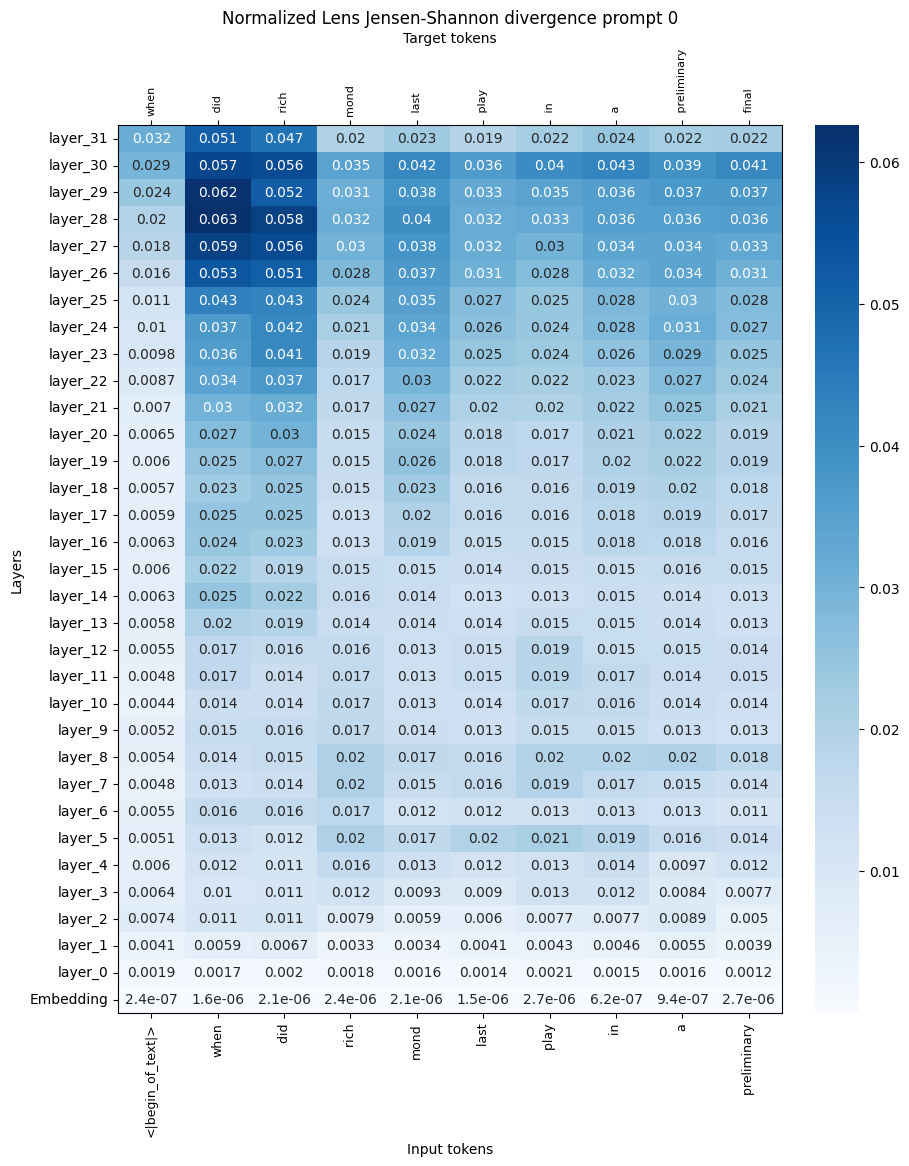

In [12]:
data = norm_data
fig_raw = "figs/norm_lens/jsd_div_prompt0.png"
plot_heatmap(
    data, tokenizer, prompt_id=0,
    metric="jsd_div", color_map="Blues",
    title="Normalized Lens Jensen-Shannon divergence",
    save_path=fig_raw
)

/tmp/ipykernel_16941/1559576777.py:26: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  input_ids = torch.tensor(rows[0]["input_ids"])
/tmp/ipykernel_16941/1559576777.py:27: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  target_ids = torch.tensor(rows[0]["targets"])
/tmp/ipykernel_16941/1559576777.py:89: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  plt.subplots_adjust(bottom=0.25, top=0.85)


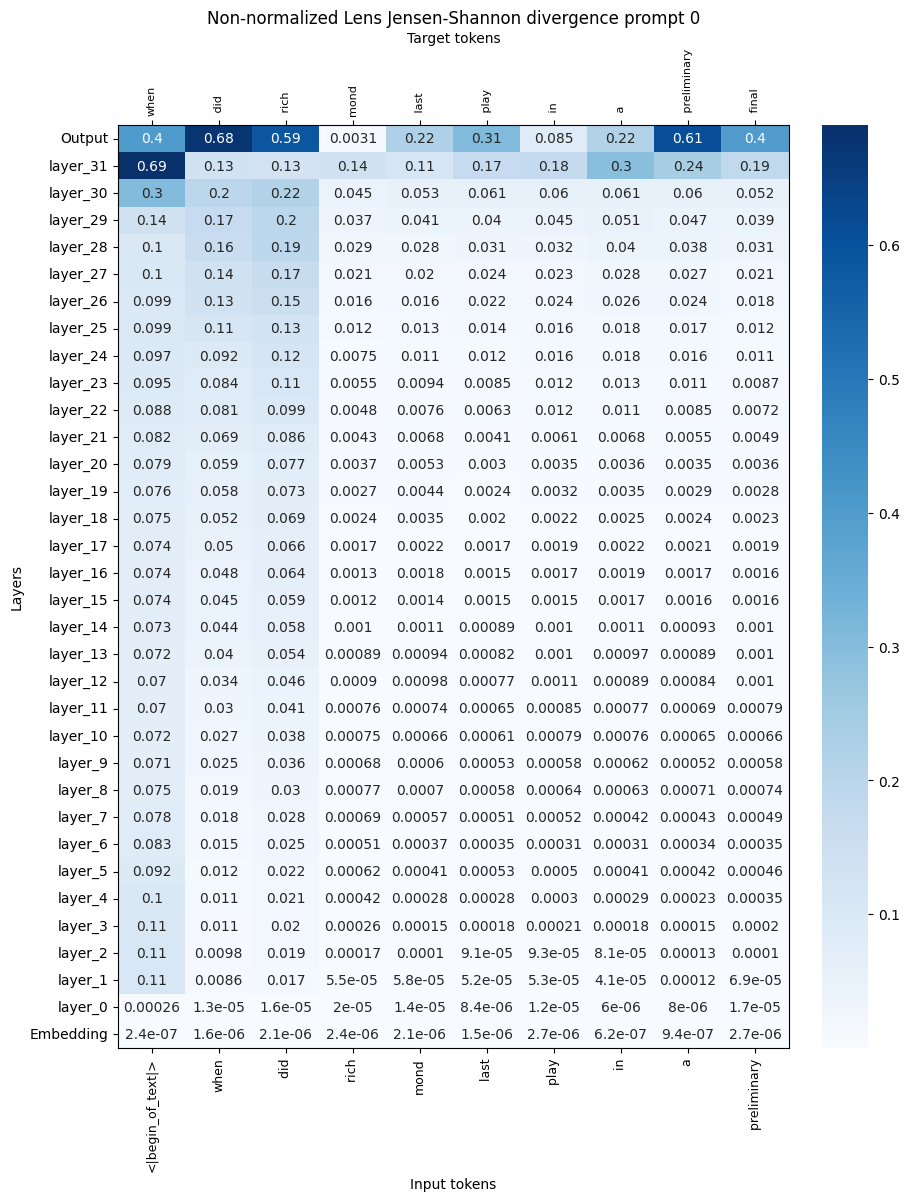

In [13]:
data = raw_data
fig_raw = "figs/raw_lens/jsd_div_prompt0.png"
plot_heatmap(
    data, tokenizer, prompt_id=0,
    metric="jsd_div", color_map="Blues",
    title="Non-normalized Lens Jensen-Shannon divergence",
    save_path=fig_raw
)

## Non-normalized Lens Analysis

## Normalized Lens Analysis